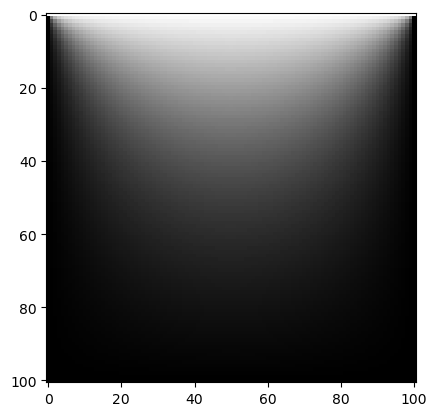

In [6]:
import numpy as np
from pywarpx import picmi
from pylab import imshow,gray,show


nx, ny = 100, 100
phi_array = np.zeros([nx+1,ny+1],float)
phi_prime = np.zeros([nx+1,ny+1],float)


phi_array[0,:]= 1

check = 1

while check  > 1e-6:
    
    for i in range (0,nx+1):
        for j in range (0,ny+1):
            if i==0 or i==nx or j==0 or j==ny:
                phi_prime[i,j] = phi_array[i,j]
            else:

                phi_prime[i,j] = 1/4*(phi_array[i+1,j]+phi_array[i-1,j]+phi_array[i,j+1]+phi_array[i,j-1])

    check = np.max(abs(phi_prime -phi_array))
    #phi_array = phi_prime.copy()
    phi_array,phi_prime = phi_prime,phi_array

imshow(phi_array)
gray()
show()

In [ ]:
import 

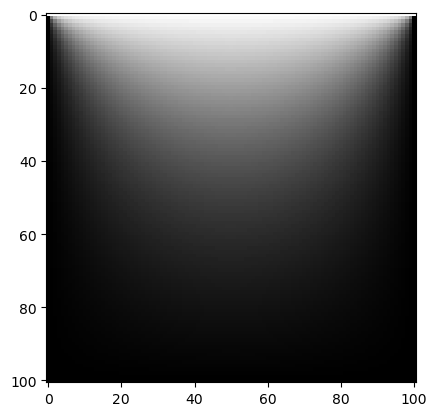

In [47]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()

Iteration: 200, Max Change: 1.21e-03
Iteration: 400, Max Change: 6.04e-04
Iteration: 600, Max Change: 4.00e-04
Iteration: 800, Max Change: 2.95e-04
Iteration: 1000, Max Change: 2.30e-04
Iteration: 1200, Max Change: 1.85e-04
Iteration: 1400, Max Change: 1.52e-04
Iteration: 1600, Max Change: 1.28e-04
Iteration: 1800, Max Change: 1.09e-04
Iteration: 2000, Max Change: 9.34e-05
Iteration: 2200, Max Change: 8.10e-05
Iteration: 2400, Max Change: 7.08e-05
Iteration: 2600, Max Change: 6.22e-05
Iteration: 2800, Max Change: 5.50e-05
Iteration: 3000, Max Change: 4.89e-05
Iteration: 3200, Max Change: 4.36e-05
Iteration: 3400, Max Change: 3.90e-05
Iteration: 3600, Max Change: 3.50e-05
Iteration: 3800, Max Change: 3.15e-05
Iteration: 4000, Max Change: 2.83e-05
Iteration: 4200, Max Change: 2.55e-05
Iteration: 4400, Max Change: 2.31e-05
Iteration: 4600, Max Change: 2.08e-05
Iteration: 4800, Max Change: 1.88e-05
Iteration: 5000, Max Change: 1.70e-05
Iteration: 5200, Max Change: 1.54e-05
Iteration: 5400,

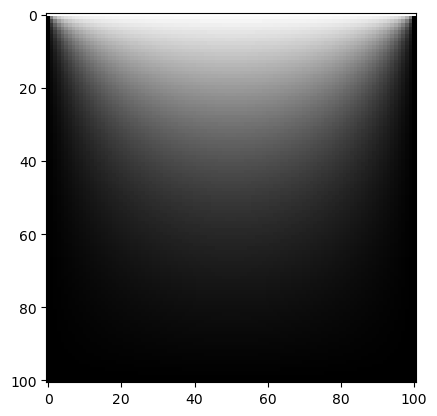

In [36]:
import numpy as np
from pylab import imshow, gray, show

# Grid setup
nx, ny = 101, 101
phi = np.zeros([nx, ny], float)

# Boundary Conditions
phi[0, :] = 1.0  # Top boundary potential = 1

# Relaxation parameters
tolerance = 1e-5
max_change = 1.0 # Initial max_change to start the loop
iterations = 0

# --- Main relaxation loop ---
while max_change > tolerance:
    # Reset max_change for the current iteration
    max_change = 0.0
    
    # Store the old potential field
    phi_old = phi.copy()

    # Iterate over INTERIOR points only
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            # Apply the Jacobi method
            phi[i, j] = (phi_old[i+1, j] + phi_old[i-1, j] +
                         phi_old[i, j+1] + phi_old[i, j-1]) / 4.0

            # Find the largest change in potential during this sweep
            change = abs(phi[i, j] - phi_old[i, j])
            if change > max_change:
                max_change = change
                
    iterations += 1
    # Optional: Print progress
    if iterations % 200 == 0:
        print(f"Iteration: {iterations}, Max Change: {max_change:.2e}")

print(f"\nConvergence reached after {iterations} iterations.")

# Display the final, converged result
imshow(phi)
gray()
show()